# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "London"
query_url = url + "appid=" + api_key + "&q="
#print(query_url)

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Beginning Data Retrieval")
print("-------------------------------------")
for city in cities:
    print("Processing | " + city)
    response = requests.get(query_url + city).json()
    if response['cod'] == '404':
        print("City not found.  Skipping...")
    else:
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")

Beginning Data Retrieval
-------------------------------------
Processing | butaritari
Processing | eresos
Processing | marcona
City not found.  Skipping...
Processing | carnarvon
Processing | hermanus
Processing | cape town
Processing | plettenberg bay
Processing | mendota
Processing | joensuu
Processing | bredasdorp
Processing | dong hoi
Processing | port blair
Processing | ushuaia
Processing | muttupet
Processing | salinopolis
Processing | dikson
Processing | barentsburg
City not found.  Skipping...
Processing | ferme-neuve
Processing | mataura
Processing | chumikan
Processing | albany
Processing | lardos
Processing | cherskiy
Processing | georgetown
Processing | viesite
Processing | rikitea
Processing | hilo
Processing | palabuhanratu
City not found.  Skipping...
Processing | egvekinot
Processing | novochernorechenskiy
Processing | umtata
Processing | qaanaaq
Processing | puerto ayora
Processing | takoradi
Processing | vaini
Processing | chokurdakh
Processing | codrington
Processin

Processing | harbour breton
Processing | coihueco
Processing | karabulak
Processing | georgiyevka
Processing | holden
Processing | ibra
Processing | sangar
Processing | walvis bay
Processing | airai
Processing | revadanda
Processing | el reno
Processing | berlevag
Processing | jeremie
Processing | iqaluit
Processing | itoman
Processing | evensk
Processing | toliary
City not found.  Skipping...
Processing | esperance
Processing | shangzhi
Processing | palmer
Processing | astana
Processing | lumberton
Processing | cabo san lucas
Processing | san carlos de bariloche
Processing | tlatlauquitepec
Processing | gamba
Processing | bambous virieux
Processing | half moon bay
Processing | mpongwe
Processing | vastseliina
Processing | khatanga
Processing | dugna
City not found.  Skipping...
Processing | fairbanks
Processing | sullana
Processing | las palmas
Processing | westport
Processing | sakakah
City not found.  Skipping...
Processing | kasongo-lunda
Processing | samarkand
Processing | daru
Pr

In [38]:
#response
#len(city_name)
#len(cloudiness)
#len(country)
#len(date)
#len(humidity)
#len(lat)
#len(lng)
#len(max_temp)
#len(wind_speed)

545

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("Resources/weather.csv", index = False, header = True)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,48,KI,1538145276,100,3.07,172.79,302.676,4.02
1,Eresos,40,GR,1538142600,60,39.17,25.93,296.150,1.00
2,Carnarvon,0,ZA,1538145277,7,-30.97,22.13,293.026,5.97
3,Hermanus,8,ZA,1538145277,52,-34.42,19.24,288.476,4.92
4,Cape Town,40,ZA,1538143200,51,-33.93,18.42,290.150,5.70


In [42]:
weather_data_read = pd.read_csv("Resources/weather.csv")
weather_data_read.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,48,KI,1538145276,100,3.07,172.79,302.676,4.02
1,Eresos,40,GR,1538142600,60,39.17,25.93,296.150,1.00
2,Carnarvon,0,ZA,1538145277,7,-30.97,22.13,293.026,5.97
3,Hermanus,8,ZA,1538145277,52,-34.42,19.24,288.476,4.92
4,Cape Town,40,ZA,1538143200,51,-33.93,18.42,290.150,5.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

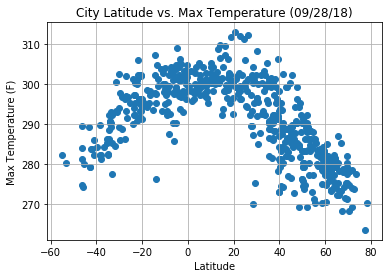

In [47]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker = "o")

plt.title("City Latitude vs. Max Temperature (09/28/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("LatvsTemp.png")

#### Latitude vs. Humidity Plot

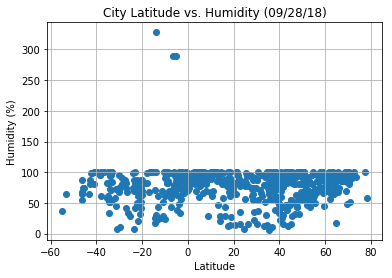

In [48]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker = "o")

plt.title("City Latitude vs. Humidity (09/28/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("LatvsHumidity.png")

#### Latitude vs. Cloudiness Plot

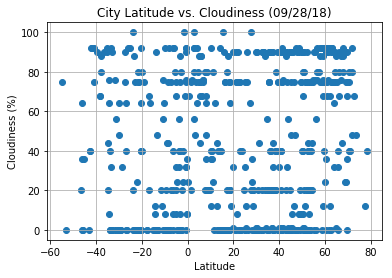

In [49]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker = "o")

plt.title("City Latitude vs. Cloudiness (09/28/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("LatvsCloudiness.png")

#### Latitude vs. Wind Speed Plot

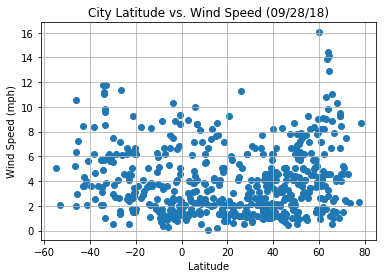

In [50]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker = "o")

plt.title("City Latitude vs. Wind Speed (09/28/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("LatvsWind.png")